In [2]:
import torch
import torch.nn as nn
import numpy as np
torch.__version__

'1.7.1'

# logistic回归实战
在这一章里面，我们将处理一下结构化数据，并使用logistic回归对结构化数据进行简单的分类。
## logistic回归介绍
logistic回归是一种广义线性回归（generalized linear model），与多重线性回归分析有很多相同之处。它们的模型形式基本上相同，都具有 wx + b，其中w和b是待求参数，其区别在于他们的因变量不同，多重线性回归直接将wx+b作为因变量，即y =wx+b,而logistic回归则通过函数L将wx+b对应一个隐状态p，p =L(wx+b),然后根据p 与1-p的大小决定因变量的值。如果L是logistic函数，就是logistic回归，如果L是多项式函数就是多项式回归。

说的更通俗一点，就是logistic回归会在线性回归后再加一层logistic函数的调用。

logistic回归主要是进行二分类预测，我们在激活函数时候讲到过 Sigmod函数，Sigmod函数是最常见的logistic函数，因为Sigmod函数的输出的是是对于0~1之间的概率值，当概率大于0.5预测为1，小于0.5预测为0。

下面我们就来使用公开的数据来进行介绍

## UCI German Credit  数据集

UCI German Credit是UCI的德国信用数据集，里面有原数据和数值化后的数据。

German Credit数据是根据个人的银行贷款信息和申请客户贷款逾期发生情况来预测贷款违约倾向的数据集，数据集包含24个维度的，1000条数据，

在这里我们直接使用处理好的数值化的数据，作为展示。

[地址](https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/)

## 代码实战
我们这里使用的 german.data-numeric是numpy处理好数值化数据，我们直接使用numpy的load方法读取即可

In [3]:
data=np.loadtxt("german.data-numeric")

数据读取完成后我们要对数据做一下归一化的处理

In [4]:
n,l=data.shape
for j in range(l-1):
    meanVal=np.mean(data[:,j])
    stdVal=np.std(data[:,j])
    data[:,j]=(data[:,j]-meanVal)/stdVal

打乱数据

In [5]:
np.random.shuffle(data)

区分训练集和测试集，由于这里没有验证集，所以我们直接使用测试集的准确度作为评判好坏的标准

区分规则：900条用于训练，100条作为测试

german.data-numeric的格式为，前24列为24个维度，最后一个为要打的标签（0，1），所以我们将数据和标签一起区分出来

In [6]:
train_data=data[:900,:l-1]
train_lab=data[:900,l-1]-1
test_data=data[900:,:l-1]
test_lab=data[900:,l-1]-1

【TODO】定义模型，训练，测试

In [7]:
from torch.autograd import Variable

# 定义模型
class Logistic(nn.Module):
    def __init__(self):
        super(Logistic, self).__init__()
        self.linear = nn.Linear(24,2)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        y = self.linear(x)
        y = self.sigmoid(y)
        return y
    

model = Logistic()
criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
epochs = 500
costs = []
accs = []
    

# 训练
for i in range(epochs):

    model.train()

    # input data -> tensor
    x = Variable(torch.from_numpy(train_data).float())
    y = Variable(torch.from_numpy(train_lab).long())
    
    out = model(x)
    loss = criterion(out, y) 
    optimizer.zero_grad()
    costs.append(loss.data.item())
    loss.backward() 
    optimizer.step() 
    
   
    model.eval()
    test_data2 = torch.from_numpy(test_data).float()
    test_lab2 = torch.from_numpy(test_lab).long()
    test_out = model(test_data2)
        
    # 测试
    t = test_out.max(-1)[1] == test_lab2
    acc = torch.mean(t.float())
    accs.append(acc)
    
    if (i+1)%10 == 0:    
        print("epoch: {}, loss: {:.4f}, acc: {:.4f}".format(i+1, loss.item(), acc))
    
    


epoch: 10, loss: 0.6912, acc: 0.5500
epoch: 20, loss: 0.6790, acc: 0.6200
epoch: 30, loss: 0.6677, acc: 0.6800
epoch: 40, loss: 0.6574, acc: 0.7300
epoch: 50, loss: 0.6482, acc: 0.7500
epoch: 60, loss: 0.6398, acc: 0.7600
epoch: 70, loss: 0.6322, acc: 0.7800
epoch: 80, loss: 0.6254, acc: 0.7800
epoch: 90, loss: 0.6193, acc: 0.7900
epoch: 100, loss: 0.6138, acc: 0.8000
epoch: 110, loss: 0.6088, acc: 0.7900
epoch: 120, loss: 0.6042, acc: 0.7800
epoch: 130, loss: 0.6001, acc: 0.7800
epoch: 140, loss: 0.5963, acc: 0.7800
epoch: 150, loss: 0.5929, acc: 0.7800
epoch: 160, loss: 0.5897, acc: 0.7800
epoch: 170, loss: 0.5868, acc: 0.7800
epoch: 180, loss: 0.5842, acc: 0.7800
epoch: 190, loss: 0.5817, acc: 0.7800
epoch: 200, loss: 0.5794, acc: 0.7900
epoch: 210, loss: 0.5772, acc: 0.7700
epoch: 220, loss: 0.5753, acc: 0.7700
epoch: 230, loss: 0.5734, acc: 0.7700
epoch: 240, loss: 0.5717, acc: 0.7700
epoch: 250, loss: 0.5701, acc: 0.7800
epoch: 260, loss: 0.5685, acc: 0.7800
epoch: 270, loss: 0.5

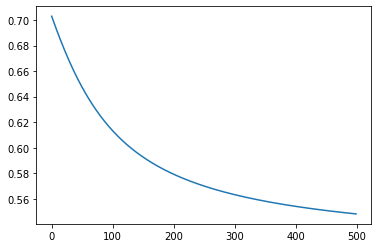

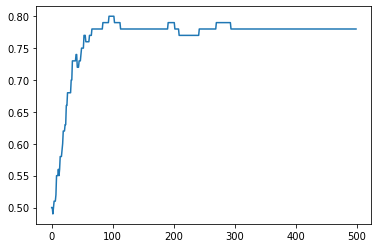

In [8]:
# 图像
# costs 损失函数图像
import matplotlib.pyplot as plt
plt.plot(costs)
plt.show(range(len(costs)), costs)

# acc 图像
plt.plot(accs)
plt.show(range(len(accs)),accs)